In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = yf.download('AAPL', start='2000-01-01', end='2024-9-30')
print(df)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2000-01-03 00:00:00+00:00    0.843076    0.999442    1.004464    0.907924   
2000-01-04 00:00:00+00:00    0.771997    0.915179    0.987723    0.903460   
2000-01-05 00:00:00+00:00    0.783293    0.928571    0.987165    0.919643   
2000-01-06 00:00:00+00:00    0.715508    0.848214    0.955357    0.848214   
2000-01-07 00:00:00+00:00    0.749402    0.888393    0.901786    0.852679   
...                               ...         ...         ...         ...   
2024-09-23 00:00:00+00:00  226.221115  226.470001  229.449997  225.809998   
2024-09-24 00:00:00+00:00  227.120117  227.369995  229.350006  225.729996   
2024-09-25 00:00:00+00:00  226.121216  226.369995  227.289993  224.020004   
2024-09-26 00:00:00+00:00  227.269958  227.520004  228.500000  225.410004   

In [3]:
df.head(3)
print('Data Column:\n', df.columns, '\n')
print('Data Types:\n', df.dtypes, '\n')
print('Shape:\n', df.shape, '\n')
print('Description of the Data:\n',df.describe(), '\n')
print('Data Info:\n', df.info(), '\n')
print('Data Sample:\n', df.sample(5), '\n')
print('Data Shape:\n', df.shape, '\n')
print('Data Size:\n', df.size, '\n')
print('Data Memory Usage:\n', df.memory_usage(deep=True), '\n')


Data Column:
 MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker']) 

Data Types:
 Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object 

Shape:
 (6224, 6) 

Description of the Data:
 Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   6224.000000  6224.000000  6224.000000  6224.000000  6224.000000   
mean      39.264394    40.712310    41.121722    40.267099    40.685403   
std       57.150797    57.458253    58.024703    56.836732    57.409872   
min        0.197631     0.234286     0.235536     0.227143     0.231964   
25%        1.97103

In [4]:
print('Number of Empty data:\n',df.isnull().sum(), "\n")
print('Number of duplicated data:\n',df.duplicated().sum(), "\n")

Number of Empty data:
 Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64 

Number of duplicated data:
 0 



In [5]:
def handle_missing_values(df):
    df_filled = df.fillna(df.mean())
    return df_filled

df = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
df_filled = handle_missing_values(df)


[*********************100%***********************]  1 of 1 completed



Correlation Analysis:


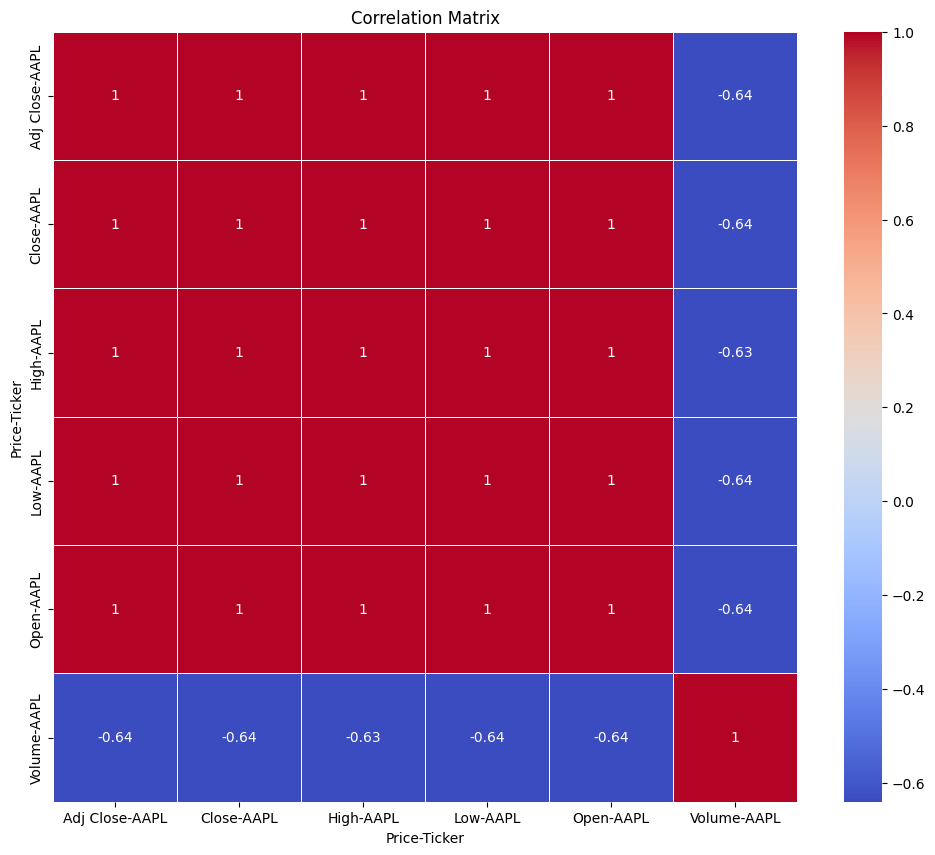

In [6]:
def correlation_analysis(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    return correlation_matrix

print("\nCorrelation Analysis:")
correlation_matrix = correlation_analysis(df)


<Axes: title={'center': 'APPL Adj Close Price'}, xlabel='Date'>

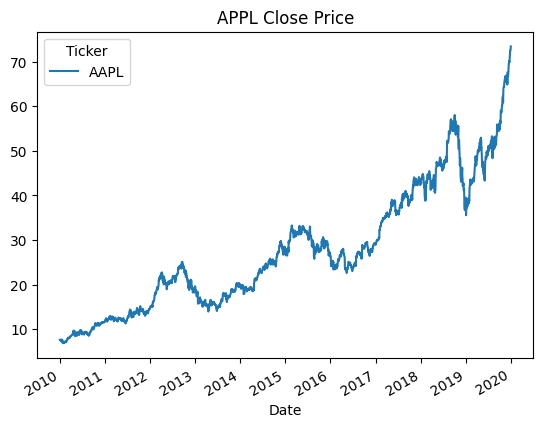

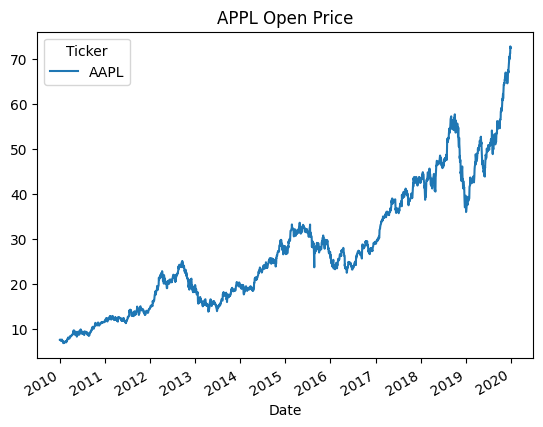

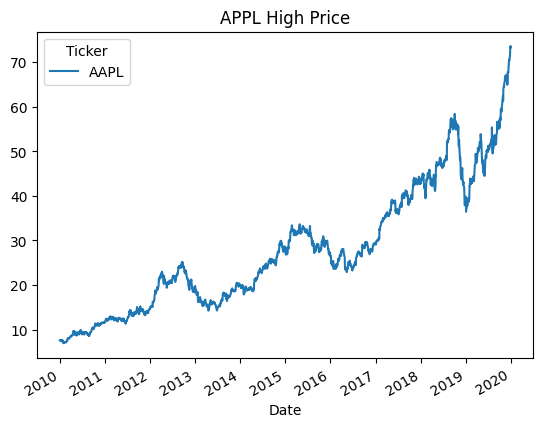

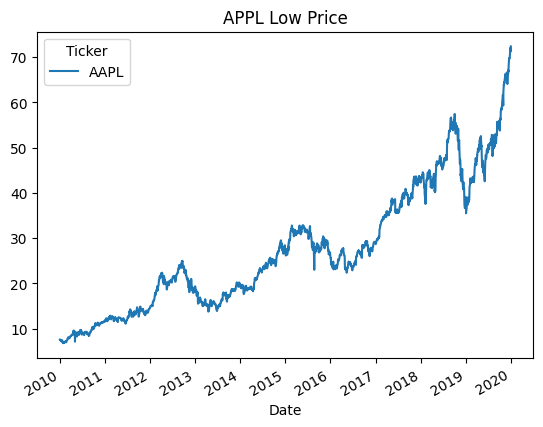

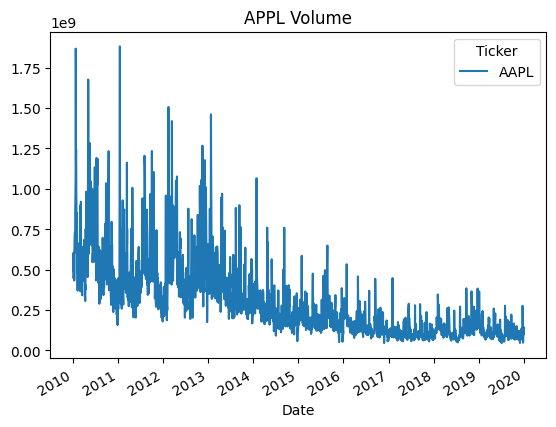

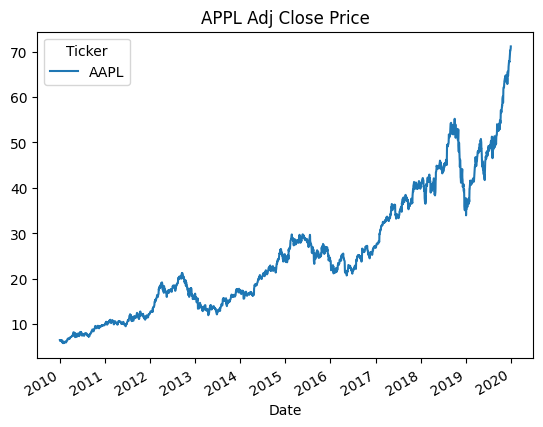

In [7]:
df.plot.line( y='Close', use_index=True, title='APPL Close Price')
df.plot.line( y='Open', use_index=True, title='APPL Open Price')
df.plot.line( y='High', use_index=True, title='APPL High Price')
df.plot.line( y='Low', use_index=True, title='APPL Low Price')
df.plot.line( y='Volume', use_index=True, title='APPL Volume')
df.plot.line( y='Adj Close', use_index=True, title='APPL Adj Close Price')



<Axes: >

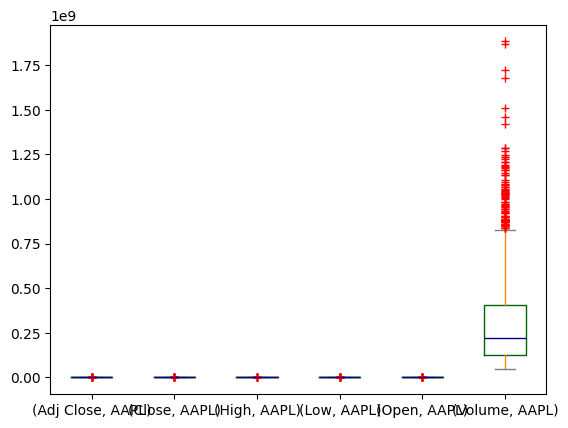

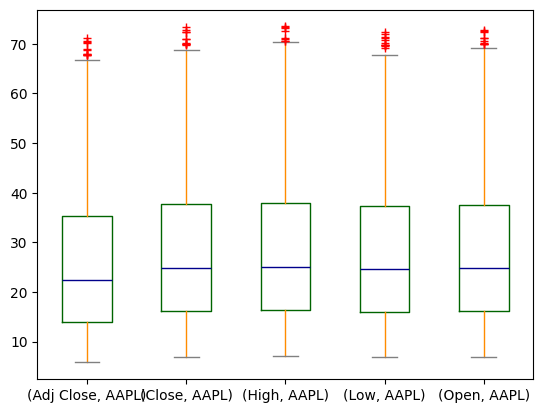

In [8]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df.plot.box(color=color, sym="r+")

df_without_volume = df.drop(columns=['Volume'])
df_without_volume.plot.box(color=color, sym="r+")

In [9]:
df.astype(float)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447411,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08 00:00:00+00:00,6.386254,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,68.898689,71.067497,71.222504,70.730003,71.172501,48478800.0
2019-12-26 00:00:00+00:00,70.265686,72.477501,72.495003,71.175003,71.205002,93121200.0



Data Distribution Analysis:


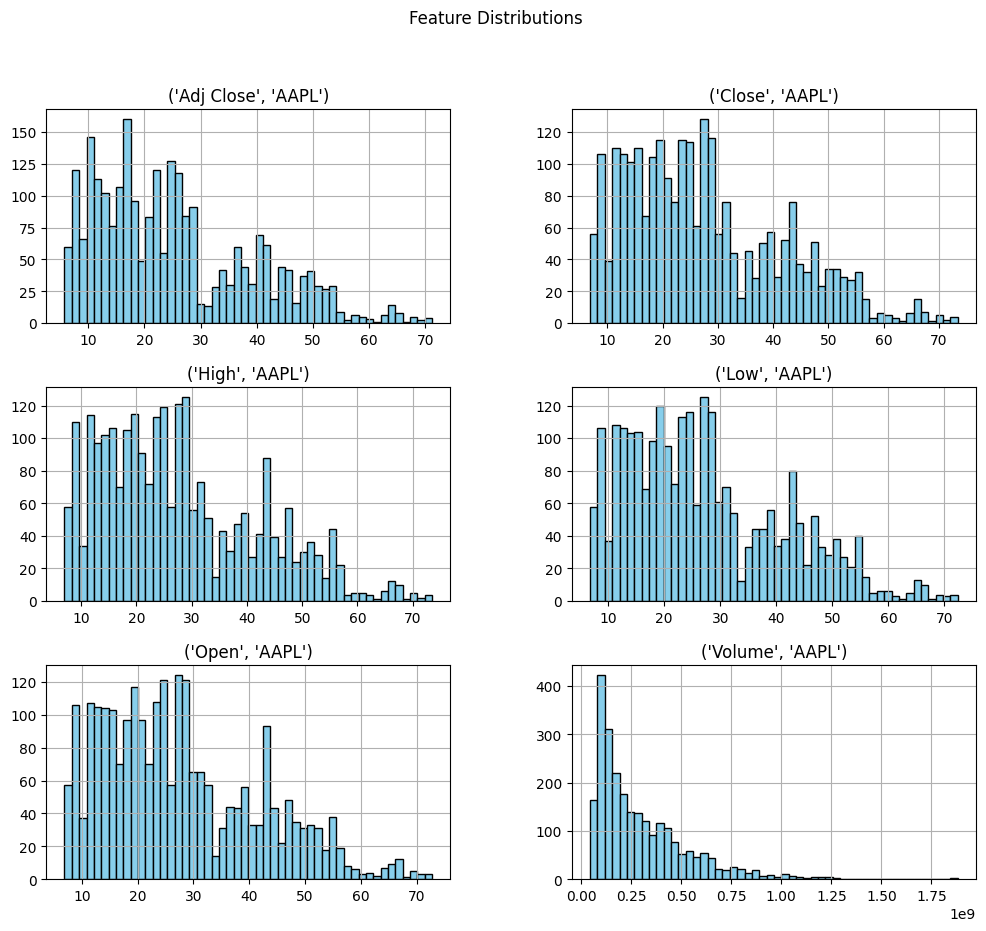


=== Feature Skewness ===
Price      Ticker
Adj Close  AAPL      0.785596
Close      AAPL      0.713525
High       AAPL      0.710232
Low        AAPL      0.710660
Open       AAPL      0.708917
Volume     AAPL      1.774039
dtype: float64


In [10]:
def data_distribution_analysis(data):
    """
    Analyze the distribution of features and the target variable.
    """
    data.hist(figsize=(12, 10), bins=50, color='skyblue', edgecolor='black')
    plt.suptitle("Feature Distributions")
    plt.show()
    skewness = data.skew()
    print("\n=== Feature Skewness ===")
    print(skewness)
    return skewness

print("\nData Distribution Analysis:")
skewness = data_distribution_analysis(df)

[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Feature Importance Analysis:


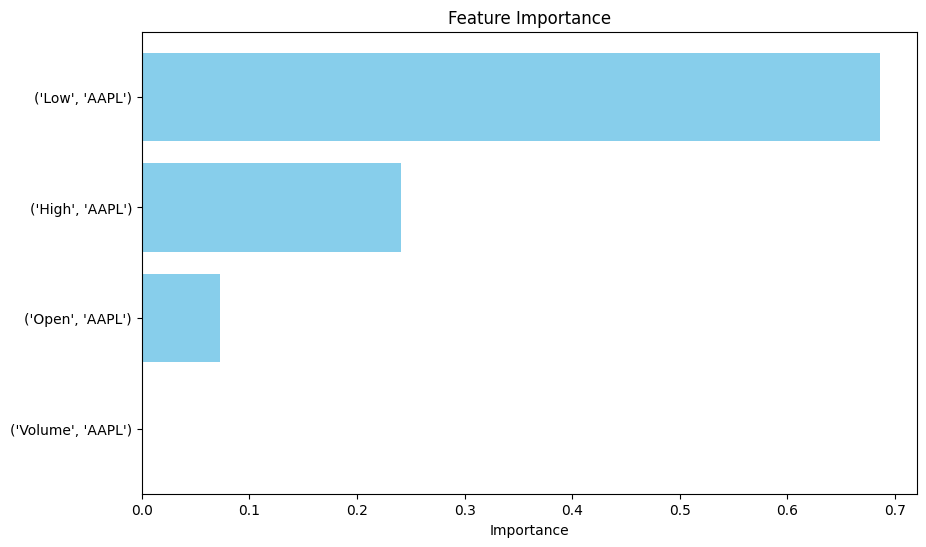

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf

def feature_importance_analysis(data, target):
    model = RandomForestRegressor()
    model.fit(data, target)
    importances = model.feature_importances_
    feature_names = data.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

    feature_importance_df['feature'] = feature_importance_df['feature'].astype(str)
    feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
    return feature_importance_df

df = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
x = df.drop(["Adj Close", "Close"], axis=1)
y = df["Adj Close"]
print("\nFeature Importance Analysis:")
feature_importance_df = feature_importance_analysis(x, y)


In [12]:
def add_technical_indicators(df):
    df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()
    df['RSI'] = compute_rsi(df['Adj Close'])
    df['MACD'] = compute_macd(df['Adj Close'])
    df.fillna(0, inplace=True)  # Handle NaNs generated by indicators
    return df

def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_macd(series, short_window=12, long_window=26):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    return macd

df_with_indicators = add_technical_indicators(df)


In [13]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


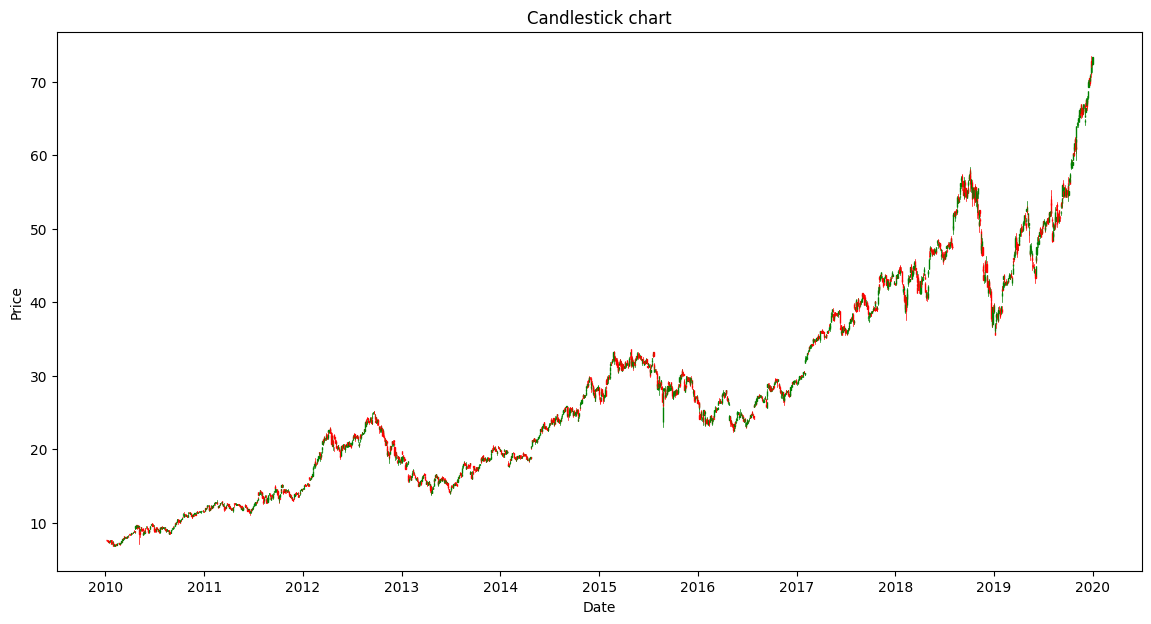

In [14]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

def plot_candlestick(df):
    df = df.loc[:, ['Open', 'High', 'Low', 'Close']]
    df.reset_index(inplace=True)
    df['Date'] = df['Date'].map(mdates.date2num)
    
    fig, ax = plt.subplots(figsize=(14, 7))
    candlestick_ohlc(ax, df.values, width=0.6, colorup='g', colordown='r')
    ax.xaxis_date()
    ax.set_title('Candlestick chart')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


plot_candlestick(df)
